http://www.local10.com/sports/college-basketball/miami-florida-florida-state-all-heading-to-big-dance

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from bs4 import element
from time import sleep
import pandas as pd
import datetime
import matplotlib as plt
%matplotlib inline


def get_page_data(year):
    url = 'http://www.sports-reference.com/cbb/postseason/'+str(year)+'-ncaa.html'
    page = urlopen(url)
    return BeautifulSoup(page, 'html.parser')

def tidy_location(loc_str):
    if loc_str.startswith('at '):
        return loc_str[len('at '):]

def tidy_team_name(team_name):
    team_name.replace(';','')

In [24]:
first_year_of_tourney = 1939
def get_bracket():
    # this works for 84 first round bye and 85 and later 64+ team bracket ignoring play-in games
    now = datetime.datetime.now()
    years = range(now.year, first_year_of_tourney - 1, -1)
    bracket = []
    for year in years: 
        soup = get_page_data(year)
        region_tags = soup.find_all("div", attrs={"data-controls": "#brackets"})[0].select('div a')           
        for region_tag in region_tags:        
            region = str(region_tag.string).lower()                           
            if region == 'final four':
                region_div = soup.find('div', {'id':'national'})
            else:
                search = {'id': region} 
                region_div = soup.find('div',**search)            
            if region_div is not None:
                bracket_rounds = region_div.div
                div_rounds = bracket_rounds.find_all('div', {'class':'round'})                
                if region == 'final four':
                    bracket_round = 5
                else:
                    bracket_round = 1
                for div_round in div_rounds:
                    if isinstance(div_round, element.Tag ):
                        for gm in div_round:
                            if isinstance(gm, element.Tag ):
                                if (len(gm.contents) >= 9):
                                    seeds_loc = gm.find_all('span')
                                    if len(seeds_loc) > 2:                                        
                                        winner = gm.find('div', {'class':'winner'})
                                        if winner is not None:
                                            winning_team = winner.find('a').string                                        
                                        seed1 = seeds_loc[0].string                                        
                                        seed2 = seeds_loc[1].string                                        
                                        currLoc = tidy_location(seeds_loc[2].string)        
                                        alist = gm.select('div a')    
                                        if len(alist) > 2:                                            
                                            team1 = alist[0].string                                            
                                            team2 = alist[2].string
                                            bracketRow = [year, region, bracket_round, seed1, team1, 
                                                          currLoc, seed2, team2, winning_team]
                                            bracket.append(bracketRow)
                        bracket_round += 1
        sleep(0.5)
    return pd.DataFrame(bracket, columns=['Year', 'Region', 'Round', 'Seed', 'Team', 
                                          'Location', 'OpponentSeed', 'Opponent', 'WinningTeam']) 

    
df = get_bracket()
df.to_csv('ncaa.csv')

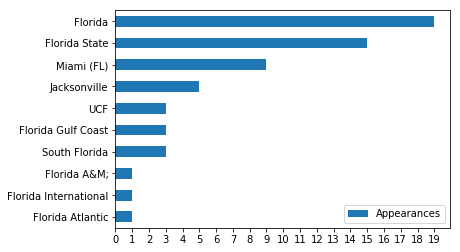

In [41]:
df1 = df.loc[(df['Round'] == 1)]
fl_list = ['Florida', 'Florida State', 'Miami (FL)', 'Jacksonville', 'UCF', 'Florida Gulf Coast', 'South Florida', 'Florida A&M;','Florida International', 'Florida Atlantic']

df1_teams_year = df1.loc[:, ['Year','Team','Opponent']]
df1_teams = df1.loc[:, ['Team','Opponent']]

fl_team_app = []
for fl_tm in fl_list:
    fl_tm_count = df1_teams[(df1_teams.Team == fl_tm) | (df1_teams.Opponent == fl_tm)]
    fl_team_app.append([fl_tm, len(fl_tm_count.index)])
sorted(fl_team_app, key=lambda l:l[1], reverse=True)

df_fl_team_app = pd.DataFrame(fl_team_app, columns=['Team', 'Appearances'])
ax = df_fl_team_app.plot.barh(xticks=range(0, df_fl_team_app.Appearances.max()+1))
ax.set_yticklabels(df_fl_team_app.Team)
ax.invert_yaxis()
#fig = ax.get_figure()
#type(ax)
ax.figure.savefig('florida_teams_ncaa_apperances.png')

In [26]:
team_counts= df1_teams.stack().value_counts()

print(team_counts)
team_counts.to_csv('ncaa_team_appearances.csv')

UNC                         38
Kansas                      38
Kentucky                    37
Duke                        35
Villanova                   35
Arizona                     34
Syracuse                    34
Louisville                  33
Notre Dame                  33
UConn                       32
UCLA                        32
Texas                       31
Temple                      31
Marquette                   31
Indiana                     30
Oklahoma                    28
Michigan State              27
St. John's (NY)             27
West Virginia               27
Illinois                    27
Purdue                      27
Georgetown                  26
Arkansas                    26
Princeton                   25
Xavier                      25
Pitt                        25
Missouri                    24
Ohio State                  24
Cincinnati                  24
Maryland                    24
                            ..
Texas-Arlington              1
Binghamt

In [7]:
fl_teams_by_year = df1_teams_year[df1_teams_year.Team.isin(fl_list)|df1_teams_year.Opponent.isin(fl_list)] 
fl_teams_by_year
fl_teams_by_year.to_csv('fl_teams_by_year.csv')

In [8]:
fl_teams_by_year

,Year,Team,Opponent
3,2017,Florida,ETSU
16,2017,Miami (FL),Michigan State
49,2017,Florida State,Florida Gulf Coast
62,2016,UNC,Florida Gulf Coast
97,2016,Miami (FL),Buffalo
233,2014,Florida,Albany (NY)
258,2013,Miami (FL),Pacific
286,2013,Florida,Northwestern State
288,2013,Georgetown,Florida Gulf Coast
319,2012,Florida State,St. Bonaventure


In [9]:
df1_teams_year_t = df1_teams_year.loc[:, ['Year','Team']][df1_teams_year.Team.isin(fl_list)]
df1_teams_year_o = df1_teams_year.loc[:, ['Year','Opponent']][df1_teams_year.Opponent.isin(fl_list)]
df1_teams_year_o.rename(columns={'Opponent':'Team'}, inplace=True)
df1_teams_fl_agg = pd.concat([df1_teams_year_t, df1_teams_year_o])
df1_teams_fl_agg.groupby('Year')
final_count = df1_teams_fl_agg.groupby('Year').count().sort_index(axis=0, ascending=False)
final_count


,Team
Year,
2017,4
2016,2
2014,1
2013,3
2012,3
2011,2
2010,2
2009,1
2008,1


In [10]:
df1_teams_fl_agg

,Year,Team
3,2017,Florida
16,2017,Miami (FL)
49,2017,Florida State
97,2016,Miami (FL)
233,2014,Florida
258,2013,Miami (FL)
286,2013,Florida
319,2012,Florida State
365,2012,Florida
399,2011,Florida


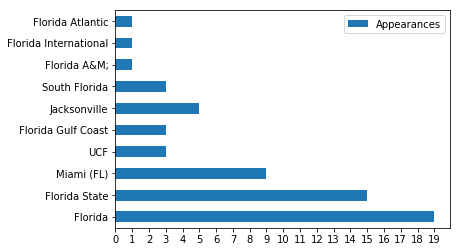

In [228]:

df1_teams_fl_agg2 = df1_teams_fl_agg.groupby('Year')
for year, fl_group in df1_teams_fl_agg2:
    print(fl_group.to_string(index=False))
    print()
    

Year        Team
1960  Miami (FL)

Year           Team
1968  Florida State

Year           Team
1972  Florida State

Year           Team
1978  Florida State

Year           Team
1980  Florida State

Year     Team
1987  Florida

Year           Team
1988        Florida
1988  Florida State

Year           Team
1989        Florida
1989  Florida State

Year           Team
1990  South Florida

Year           Team
1991  Florida State

Year           Team
1992  Florida State
1992  South Florida

Year           Team
1993  Florida State

Year     Team
1994  Florida
1994      UCF

Year                   Team
1995                Florida
1995  Florida International

Year Team
1996  UCF

Year           Team
1998  Florida State
1998     Miami (FL)

Year          Team
1999    Miami (FL)
1999       Florida
1999  Florida A&M;

Year        Team
2000     Florida
2000  Miami (FL)

Year     Team
2001  Florida

Year              Team
2002           Florida
2002        Miami (FL)
2002  Florida Atlantic

Year 